In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df_h = pd.read_csv("data/lih_h.csv", index_col="d")
df_u = pd.read_csv("data/lih_u.csv", index_col="d")
df_toeplitz = pd.read_csv("data/lih_toeplitz.csv", index_col="d")
df_tebd = pd.read_csv("data/lih_tebd.csv", index_col="d")
dfs = [df_h, df_u, df_toeplitz, df_tebd]

In [27]:
ground_energy = -7.784460280031223

In [28]:
for df in dfs:
    df["err"] = np.abs(df["energy"] - ground_energy)

In [29]:
all_dmax = [np.max(df.index) for df in dfs]
d_max = max(all_dmax)

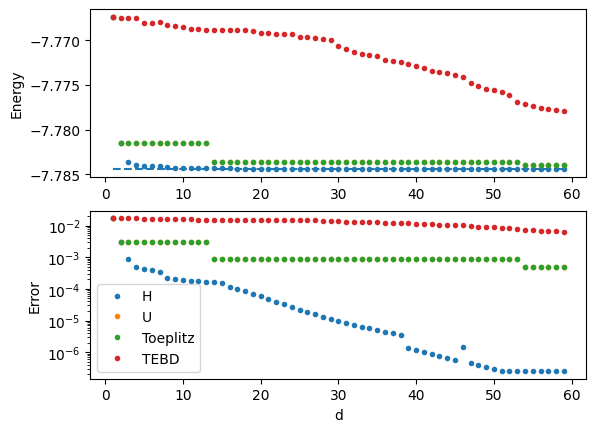

In [30]:
labels = ["H", "U", "Toeplitz", "TEBD"]
fig, ax = plt.subplots(2, 1)
for label, df in zip(labels, dfs):
    ax[0].plot(df.index, df["energy"], '.', label=label)
    ax[1].plot(df.index, df["err"], '.', label=label)
ax[0].hlines(ground_energy, 1., d_max, linestyles='--', label="Ground state")
ax[1].set_xlabel("d")
ax[0].set_ylabel("Energy")
ax[1].set_ylabel("Error")
ax[1].set_yscale("log")
# ax[1].set_xscale("log")
plt.legend()